# AI-Driven Mental Readiness Assessment Analysis

## Data Loading and Preprocessing

In [21]:
import pandas as pd
from textblob import TextBlob

file_path = "Copy of AI-Driven Mental Readiness Assessment for Defense Forces (Autosaved)(1).csv.xlsx"
df = pd.read_csv("/content/Mental_Health_Responses_CreatedByHemant.csv")

numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
textual_columns = df.select_dtypes(include=["object"]).columns.tolist()

non_response_columns = ["Timestamp", "Name", "Gender", "Role"]
textual_columns = [col for col in textual_columns if col not in non_response_columns]

sentiment_results_text = {}
for col in textual_columns:
    sentiments = df[col].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
    sentiment_results_text[col] = sentiments

sentiment_df_text = pd.DataFrame(sentiment_results_text)

def map_numeric_sentiment(value):
    if value <= 2:
        return -1
    elif value == 3:
        return 0
    else:
        return 1

numeric_sentiment_df = df[numeric_columns].map(map_numeric_sentiment)

combined_sentiment_df = pd.concat([sentiment_df_text, numeric_sentiment_df], axis=1)

combined_sentiment_df.head()

,Do you consent to participate in this self-assessment survey?,"Are you currently under any professional mental health care (therapy, counseling, medication, etc.)?",Little interest or pleasure in doing things,"Feeling down, depressed, or hopeless",Trouble sleeping or sleeping too much,Feeling tired or having little energy,Changes in appetite (poor appetite or overeating),Feeling bad about yourself or like a failure,"Trouble concentrating (e.g., on reading or TV)",Moving or speaking unusually slowly or being fidgety and restless,...,"If you had to make a decision that benefits the group but harms your own interests, what would you prioritize and why?",Do you have a strong sense of purpose or mission that keeps you going?,What motivates you to keep going when things get tough?,Do you think your mental health is as good as most people's?,Do you feel hopeful about your future most of the time?,Are you satisfied with your relationships and social connections?,Are you able to contribute to your community or society?,Do you feel emotionally stable today?,Do you have a strong sense of purpose or mission that keeps you going? .1,Do you feel you can talk openly with your peers or team leader about your emotions
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,1,1,1,0,-1,0,1,-1,-1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,-1,-1,1,1,0,0,-1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,1,1,1,-1,1,-1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,0,0,1,0,0,1,-1,0,-1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,-1,0,-1,-1,-1,1,-1,0,0


## Sentiment Score Calculation

In [23]:
df["Total_Sentiment_Score"] = combined_sentiment_df.sum(axis=1)

df[["Name", "Total_Sentiment_Score"]].head()

,Name,Total_Sentiment_Score
0,Ivaan Gupta,2.33750
1,Krishna Mehta,1.84375
2,Darsh Patel,2.50000
3,Ivaan Gupta,-3.36250
4,Laksh Sharma,-11.56250


## Clustering Analysis

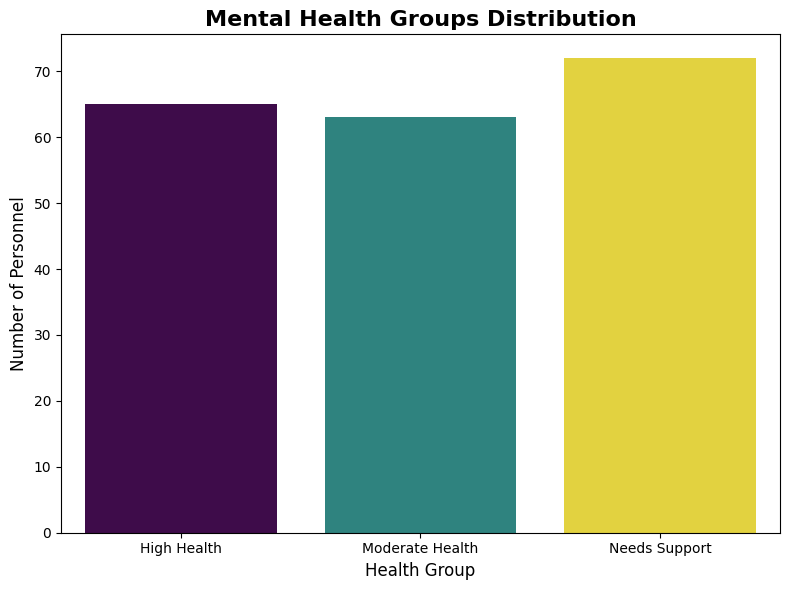

,Name,Total_Sentiment_Score,Sentiment_Cluster
0,Ivaan Gupta,2.33750,2
1,Krishna Mehta,1.84375,1
2,Darsh Patel,2.50000,1
3,Ivaan Gupta,-3.36250,2
4,Laksh Sharma,-11.56250,1


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.environ['OMP_NUM_THREADS'] = '1'

scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_sentiment_df)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Sentiment_Cluster"] = kmeans.fit_predict(scaled_data)

cluster_counts = df["Sentiment_Cluster"].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis", hue=cluster_counts.index, legend=False)
plt.title("Mental Health Groups Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Health Group", fontsize=12)
plt.ylabel("Number of Personnel", fontsize=12)
plt.xticks([0, 1, 2], ['High Health', 'Moderate Health', 'Needs Support'])
plt.tight_layout()
plt.show()

df[["Name", "Total_Sentiment_Score", "Sentiment_Cluster"]].head()

### Optimal Cluster Analysis

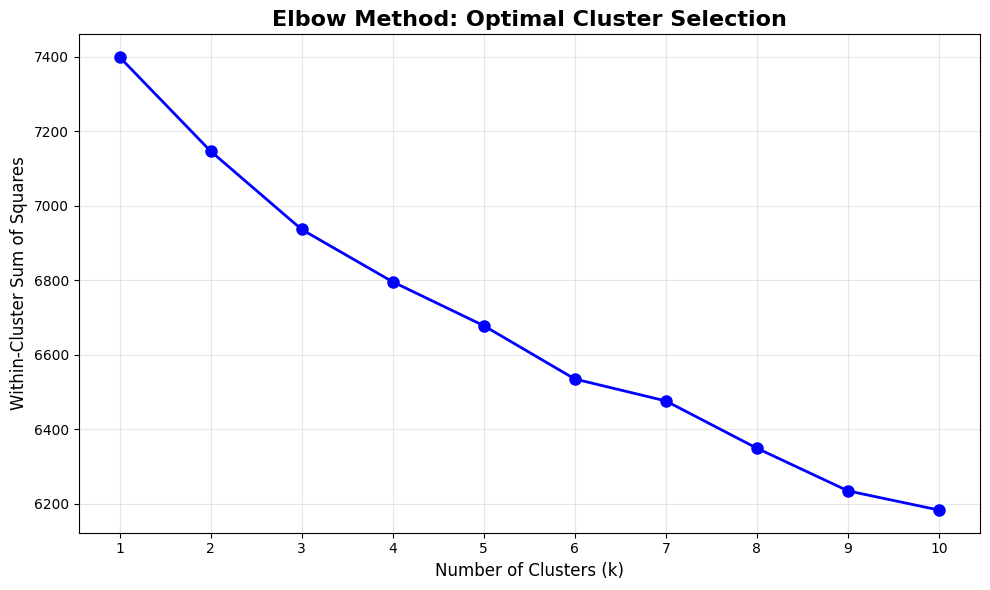

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

os.environ['OMP_NUM_THREADS'] = '1'

scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_sentiment_df)

wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Within-Cluster Sum of Squares", fontsize=12)
plt.title("Elbow Method: Optimal Cluster Selection", fontsize=16, fontweight='bold')
plt.xticks(K)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Detailed Cluster Analysis

In [26]:
numeric_sentiment_df_cleaned = combined_sentiment_df.select_dtypes(include=["number"])

df_numeric = pd.concat([df[['Sentiment_Cluster']], numeric_sentiment_df_cleaned], axis=1)

cluster_summary = df_numeric.groupby("Sentiment_Cluster").mean(numeric_only=True)

cluster_summary.head()

,Do you consent to participate in this self-assessment survey?,"Are you currently under any professional mental health care (therapy, counseling, medication, etc.)?",Little interest or pleasure in doing things,"Feeling down, depressed, or hopeless",Trouble sleeping or sleeping too much,Feeling tired or having little energy,Changes in appetite (poor appetite or overeating),Feeling bad about yourself or like a failure,"Trouble concentrating (e.g., on reading or TV)",Moving or speaking unusually slowly or being fidgety and restless,...,"If you had to make a decision that benefits the group but harms your own interests, what would you prioritize and why?",Do you have a strong sense of purpose or mission that keeps you going?,What motivates you to keep going when things get tough?,Do you think your mental health is as good as most people's?,Do you feel hopeful about your future most of the time?,Are you satisfied with your relationships and social connections?,Are you able to contribute to your community or society?,Do you feel emotionally stable today?,Do you have a strong sense of purpose or mission that keeps you going? .1,Do you feel you can talk openly with your peers or team leader about your emotions
Sentiment_Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,-0.075000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.092308,-0.046154,-0.046154,-0.400000,-0.138462,0.246154,-0.430769,0.323077,0.400000,-0.061538
1,0.0,0.0,-0.080357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.206349,-0.063492,0.111111,0.460317,-0.158730,0.206349,0.253968,-0.222222,-0.269841,-0.126984
2,0.0,0.0,-0.049479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.152778,-0.027778,-0.222222,0.055556,-0.263889,0.361111,-0.055556,-0.305556,0.138889


## Cluster Characteristic Heatmap

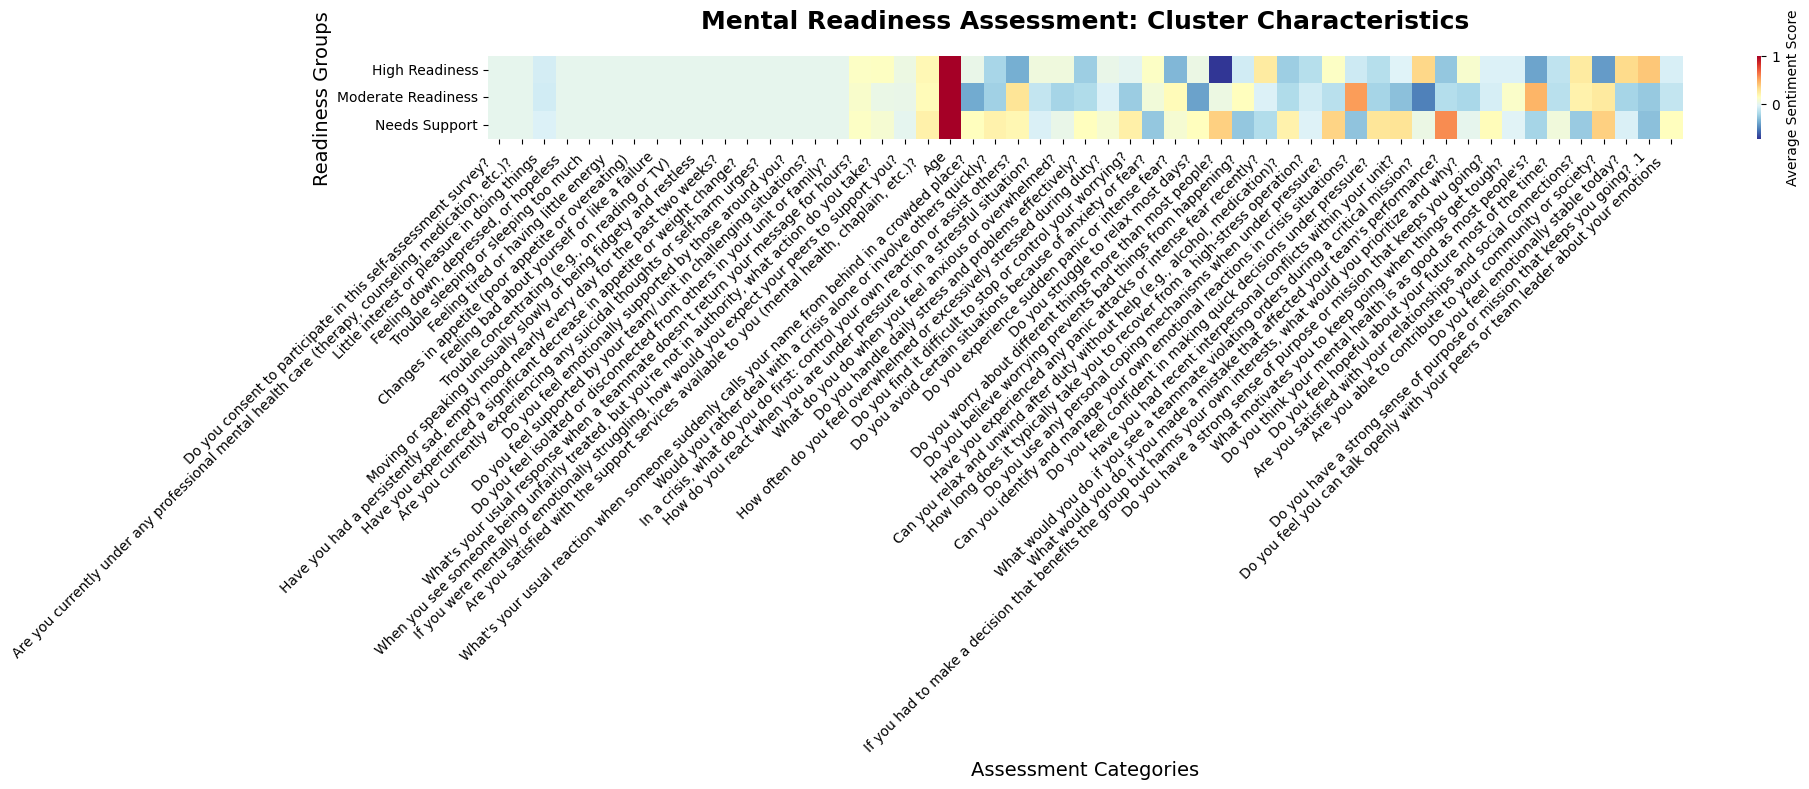

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 8))
sns.heatmap(cluster_summary, cmap="RdYlBu_r", annot=False, fmt=".2f", cbar=True,
            cbar_kws={'label': 'Average Sentiment Score'})

plt.xticks(rotation=45, ha='right')
plt.title("Mental Readiness Assessment: Cluster Characteristics", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Assessment Categories", fontsize=14)
plt.ylabel("Readiness Groups", fontsize=14)
plt.yticks([0.5, 1.5, 2.5], ['High Readiness', 'Moderate Readiness', 'Needs Support'], rotation=0)
plt.tight_layout()
plt.show()

## Analysis Summary

The mental readiness assessment has identified three distinct groups within the defense personnel:

- **High Readiness Group (Cluster 0)**: Personnel with positive mental readiness indicators
- **Moderate Readiness Group (Cluster 1)**: Personnel with mixed mental readiness patterns
- **Needs Support Group (Cluster 2)**: Personnel requiring additional mental health support

This clustering analysis provides actionable insights for targeted intervention strategies and resource allocation.